In this mini-lecture, we study how to work with time series. We break our session into 2 parts: 1) working with dates and times objects in Python, 2) working with dates and time in numpy, and 3) working with time series data in pandas and visualization methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import os

from datetime import datetime
from dateutil import parser
from pandas.tseries.offsets import BDay


%matplotlib inline

In [2]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)

#### I. Dates and Times in Python

Python's basic objects for working with dates and times reside in the built-in 'datetime' module. Along witht he third-party 'dateutil' module, you can quickly perform a host of useful functionalities on dates and times. Here are some examples:

In [3]:
dt1=datetime(year=2015, month=7, day=4)
print(type(dt1))
print(dt1)

<class 'datetime.datetime'>
2015-07-04 00:00:00


In [4]:
dt2=parser.parse("4th of July, 2018")
print(type(dt2))
print(dt2)

<class 'datetime.datetime'>
2018-07-04 00:00:00


Once you have a 'datetime' object, you can do things like printing the day of the week:

In [5]:
print(dt1.strftime('%A'))
print(dt2.strftime('%A'))

Saturday
Wednesday


The format '%A' represents "weekday as locale’s full name". In fact, there are many formats like these, and they are case-sensitive. More details can be found here: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior.

In [6]:
print(dt1.strftime('%b')) # month as locale’s abbreviated name
print(dt2.strftime('%B')) # month as locale’s full name

Jul
July


Here comes a little more programming theory. In Python, date and time objects may be categorized as "aware" or "naive". 

With sufficient knowledge of applicable algorithmic and political time adjustments, such as time zone and daylight saving time information, an **aware object** can locate itself relative to other aware objects. An aware object represents a specific moment in time that is not open to interpretation (that is, we ignore the effects of relativity). 

In comparison, a **naive object** does not contain enough information to unambiguously locate itself relative to other date/time objects. Whether a naive object represents Coordinated Universal Time (UTC), local time, or time in some other timezone is purely up to the program, just like it is up to the program whether a particular number represents metres, miles, or mass. Naive objects are easy to understand and to work with, at the cost of ignoring some aspects of reality.

For applications requiring aware objects, datetime and time objects have an optional time zone information attribute called "tzinfo", that can be set to an instance of a subclass of the abstract "tzinfo" class. These "tzinfo" objects capture information about the offset from UTC time, the time zone name, and whether daylight saving time is in effect.

Only one concrete "tzinfo" class, the "timezone" class, is supplied by the "datetime" module. The "timezone" class can represent simple timezones with fixed offsets from UTC, such as UTC itself or North American EST and EDT timezones. Supporting timezones at deeper levels of detail is up to the application. The rules for time adjustment across the world are more political than rational, change frequently, and there is no standard suitable for every application aside from UTC.

Here are the available types:
    
   1. Class datetime.date: an idealized naive date, assuming the current Gregorian calendar always was, and always will be, in effect. Attributes: year, month, and day.
   2. Class datetime.time: an idealized time, independent of any particular day, assuming that every day has exactly 24*60*60 seconds (there is no notion of 'leap seconds' here). Attributes: hour, minute, second, microsecond, and tzinfo.
   3. Class datetime.datetime: a combination of a date and a time. Attributes: year, month, day, hour, minute, second, microsecond, and tzinfo.
   4. Class datetime.timedelta: a duration expressing the difference between two date, time, or datetime instances to microsecond resolution.
   5. Class datetime.tzinfo: an abstract base class for time zone information objects. These are used by the datetime and time classes to provide a customizable notion of time adjustment (for example, to account for time zone and/or daylight saving time).
   6. Class datetime.timezone: a class that implements the tzinfo abstract base class as a fixed offset from the UTC.
    
Objects of these types are immutable. Again, more details can be found at https://docs.python.org/3/library/datetime.html#id5. The documentation also discusses how to tell if the objects are aware or naive.

#### II. Typed Arrays of Times

The weakness of Pythons' datetime format inspired program developers to add a set of native time series data type to 'numpy'. The 'datetime64' dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. THe 'datetime64' requires a very specific input format:

In [7]:
dt3=np.array('2015-08-18', dtype=np.datetime64)
print(dt3)
print(type(dt3))

2015-08-18
<class 'numpy.ndarray'>


Once we have this date formatted, we can quickly do vectorized operations on it:

In [8]:
print(np.arange(12))
dt3+np.arange(12)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array(['2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21',
       '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25',
       '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29'],
      dtype='datetime64[D]')

One detail of the 'datetime64' and 'timedelta64' objects is that they are built on a fundamental time unit. Because the 'datetime64' object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit. In other words, 'datetime64' imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years. Numpy will infer the desired unit from the input. Below is an example that compares a day-based 'datetime' and a minute-based 'datetime':

In [9]:
print(np.datetime64('2015-07-04'))
print(np.datetime64('2015-07-04 12:00'))
print(type(np.datetime64('2015-07-04 12:00')))

2015-07-04
2015-07-04T12:00
<class 'numpy.datetime64'>


Notice that the time zone is automatically set to the local time on the computer executing the code. You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [10]:
print(np.datetime64('2015-07-04 12:59:59.50', 'ns'))

2015-07-04T12:59:59.500000000


The numpy 'datetime64' documentation lists the available format codes along with the relative and absolute timespans that they can encode. Here is the link: https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html. For the types of data we see in the real world, a useful default is datetime64[ns], as it can encode a useful range of modern dates with a suitably fine precision.

#### III. Dates and Times in Pandas

Pandas builds upon all the tools just discussed to provide a 'Timestamp' object, which combines the ease-of-use of 'datetime' and 'dateutil' with the efficient storage and vectorized interface of 'numpy.datetime64'. From a group of these 'Timestamp' objects, Pandas can construct a 'DatetimeIndex' that can be used to index data in 'Series' or 'DataFrame' objects.

Here is our first example: we can parse a flexibly formatted string date, and use format codes to output the day of the week.

In [11]:
dt4 = pd.to_datetime("4th of July, 2019")
print(dt4)
print(dt4.strftime('%A'))
type(dt4)

2019-07-04 00:00:00
Thursday


pandas._libs.tslibs.timestamps.Timestamp

Additionally, we can do numpy-style vectorized operations directly on this same object:

In [12]:
dt4 + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07',
               '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15'],
              dtype='datetime64[ns]', freq=None)

Where the time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a 'Series' object that has time indexed data:

In [13]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
data = pd.Series([0, 921, 24, 378], index=index)
print(type(data))
data

<class 'pandas.core.series.Series'>


2014-07-04      0
2014-08-04    921
2015-07-04     24
2015-08-04    378
dtype: int64

Now that we have this data in a 'Series' object, we can make use of any of the 'Series' indexing patterns we discussed earlier, passing values that can be coerced into dates:

In [14]:
data['2014-07-04':'2015-07-04']

2014-07-04      0
2014-08-04    921
2015-07-04     24
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [15]:
data['2015']

2015-07-04     24
2015-08-04    378
dtype: int64

We now introduce the fundamental data structures in 'pandas' for working with time series data:

   1. For time stamps, the library provides the 'Timestamp' type. This type of object is essentially a replacement for Python's native 'datetime', but is based on the more efficient 'numpy.datetime64' data type. The associated index structure is 'DatetimeIndex'.
   2. For time periods, the library provides the 'Period' type. This encodes a fixed-frequency interval based on 'numpy.datetime64'. The associated index structure is 'PeriodIndex'.
   3. For time deltas or durations, the library provides the 'Timedelta' type. 'Timedelta' is a more efficient replacement for Python's native 'datetime.timedelta' type, and is based on 'numpy.timedelta64'. The associated index structure is 'TimedeltaIndex'.
   
The most fundamental of these date/time objects are the 'Timestam'p and 'DatetimeIndex' objects. While these class objects can be invoked directly, it is more common to use the pd.to_datetime() function, which can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a 'Timestamp'; passing a series of dates by default yields a 'DatetimeIndex'. The 'DatetimeIndex' is an immutable 'ndarray' of 'datetime64' data, represented internally as int64, and which can be boxed to 'Timestamp' objects that are subclasses of 'datetime' and carry metadata such as frequency information. More information can be found here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html. One can use the pd.date_range() to create a 'DatetimeIndex' object. 

In [16]:
unformatted_timelist=[datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708']
dt5 = pd.to_datetime(unformatted_timelist)
print(dt5)
type(dt5)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
didx = pd.date_range('1/1/2018 11:59:00', periods=3, freq='min') 
print(didx) 
type(didx)

DatetimeIndex(['2018-01-01 11:59:00', '2018-01-01 12:00:00',
               '2018-01-01 12:01:00'],
              dtype='datetime64[ns]', freq='T')


pandas.core.indexes.datetimes.DatetimeIndex

Any 'DatetimeIndex' can be converted to a 'PeriodIndex' with the to_period() method with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [18]:
print(didx.to_period('M'))
print(didx.to_period('D'))

PeriodIndex(['2018-01', '2018-01', '2018-01'], dtype='period[M]', freq='M')
PeriodIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='period[D]', freq='D')


A 'TimedeltaIndex is created', for example, when a date is subtracted from another:

In [19]:
didx - didx[0]

TimedeltaIndex(['00:00:00', '00:01:00', '00:02:00'], dtype='timedelta64[ns]', freq=None)

Besides the function pd.date_range() for timestamps, there are other available functions to work with time sequences. For example, pd.period_range() for periods, and pd.timedelta_range() for time deltas. We've seen that Python's range() and numpy's np.arange() turn a startpoint, endpoint, and optional step size into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [20]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods. Same for the time periods with the 'hour' frequenc:

In [21]:
print(pd.date_range('2015-07-03', periods=8, freq='Y'))
print(pd.date_range('2015-07-03', periods=9, freq='H'))
print(pd.timedelta_range(0, periods=10, freq='H'))

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00',
               '2015-07-03 08:00:00'],
              dtype='datetime64[ns]', freq='H')
TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')


Fundamental to these Pandas time series tools is the concept of a frequency or date offset. Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available:

   1. D: Calendar day	
   2. B: Business day
   3. W: Weekly	
   4. M: Month end	
   5. BM: Business month end
   6. Q: Quarter end	
   7. BQ: Business quarter end
   8. A: Year end	
   9. BA: Business year end
   10. H: Hours
   11. BH: Business hours
   12. T: Minutes		
   13. S: Seconds		
   14. L: Milliseonds		
   15. U: Microseconds	
   16. N: nanoseconds		

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:

   1. MS: Month start
   2. BMS: Business month start
   3. QS: Quarter start
   4. BQS: Business quarter start
   5. AS: Year start		
   6. BAS: Business year start
   
Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix: Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc., or A-JAN, BA-FEB, AS-MAR, BAS-APR, etc. In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code: W-SUN, W-MON, W-TUE, W-WED, etc.

For information related to dates and time offsets, see the documentation here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html.

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [22]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the 'pd.tseries.offsets' module. For example, we can create a business day offset directly as follows:

In [23]:
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

#### IV. Resampling, Shifting and Windowing in Pandas

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the pandas time series tools. The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example. Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data. For example, the accompanying 'pandas-datareader' package (installable via conda install pandas-datareader), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others. Notice that some of these API may be discontinued for the future. But here as an illustrative example, we will load VIX's data, which judges market's volatility:

In [24]:
vix = pdr.data.DataReader("VIXCLS", "fred")
vix.head()

,VIXCLS
DATE,
2015-02-16,NaN
2015-02-17,15.80
2015-02-18,15.45
2015-02-19,15.29
2015-02-20,14.30


We can visualize this using the plot() method, after the normal Matplotlib setup boilerplate:

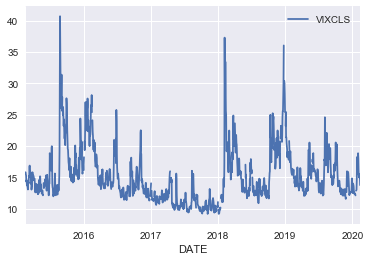

In [25]:
sns.set() # setting aesthetic parameters in one step, see https://seaborn.pydata.org/generated/seaborn.set.html
vix.plot()

One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

Taking a look at the closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year. Notice the difference: at each point, resample() reports the average of the previous year, while asfreq() reports the value at the end of the year.

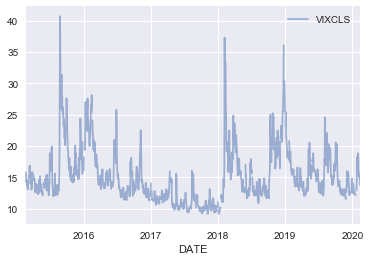

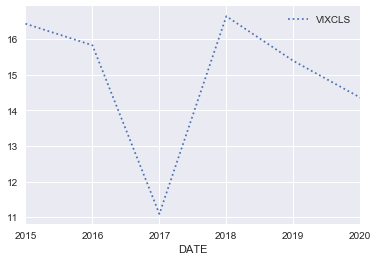

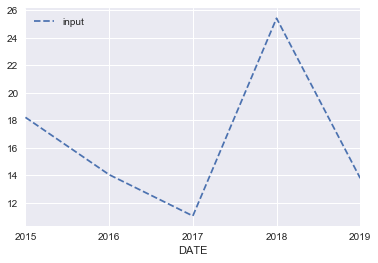

In [26]:
vix.plot(alpha=0.5, style='-')
vix.resample('BA').mean().plot(style=':')
vix.asfreq('BA').plot(style='--') # BA: business year end
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

For up-sampling, resample() and asfreq() are largely equivalent, though resample() has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function, asfreq() accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends). Below, the top panel is the default: non-business days are left as NA values and do not appear on the plot. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

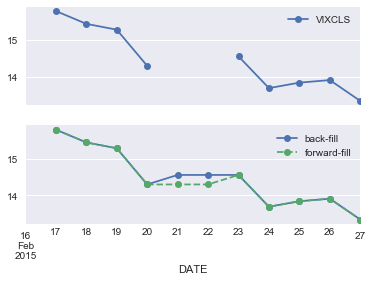

In [27]:
fig, ax = plt.subplots(2, sharex=True)
data = vix.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency. Here in the example, we will both shift() and tshift() by 8 days:

In [28]:
vix2=vix.shift(8)
print(vix.head(10))
print(vix2.head(10))

            VIXCLS
DATE              
2015-02-16     NaN
2015-02-17   15.80
2015-02-18   15.45
2015-02-19   15.29
2015-02-20   14.30
2015-02-23   14.56
2015-02-24   13.69
2015-02-25   13.84
2015-02-26   13.91
2015-02-27   13.34
            VIXCLS
DATE              
2015-02-16     NaN
2015-02-17     NaN
2015-02-18     NaN
2015-02-19     NaN
2015-02-20     NaN
2015-02-23     NaN
2015-02-24     NaN
2015-02-25     NaN
2015-02-26     NaN
2015-02-27    15.8


In [29]:
vix3=vix.tshift(8)
print(vix.head(10))
print(vix3.head(10))

            VIXCLS
DATE              
2015-02-16     NaN
2015-02-17   15.80
2015-02-18   15.45
2015-02-19   15.29
2015-02-20   14.30
2015-02-23   14.56
2015-02-24   13.69
2015-02-25   13.84
2015-02-26   13.91
2015-02-27   13.34
            VIXCLS
DATE              
2015-02-26     NaN
2015-02-27   15.80
2015-03-02   15.45
2015-03-03   15.29
2015-03-04   14.30
2015-03-05   14.56
2015-03-06   13.69
2015-03-09   13.84
2015-03-10   13.91
2015-03-11   13.34


Rolling statistics are a third type of time series-specific operation implemented by pandas. These can be accomplished via the rolling() attribute of 'Series' and 'DataFrame' objects, which returns a view similar to what we saw with the groupby operation. This rolling view makes available a number of aggregation operations by default. The concept of rolling window calculation is most primarily used in signal processing and time series data. In a very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case all the k values are equally weighted. The rolling() method is very rich in its arguments and functionality. For example, the argument 'window' indicates the size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size. If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for date-time-like indexes.

In [30]:
df1 = pd.DataFrame({'B': [0, 1, 2, 3, 5, np.nan, 4, 9]})
print(df1)

     B
0  0.0
1  1.0
2  2.0
3  3.0
4  5.0
5  NaN
6  4.0
7  9.0


Here is the rolling sum with a window length of 2, using the ‘triang’ window type (triangular-type windows):

In [31]:
df1.rolling(window=2, win_type='triang').sum()

,B
0,NaN
1,0.5
2,1.5
3,2.5
4,4.0
5,NaN
6,NaN
7,6.5


In [32]:
df1.rolling(window=3, win_type=None).sum() # window size of 3, and all points are evenly weighted due to to win_type=None

,B
0,NaN
1,NaN
2,3.0
3,6.0
4,10.0
5,NaN
6,NaN
7,NaN


#### V. Time Series Data Working Example

We now give a working example of the time series data on bicycle counts on Seattle's Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from the link https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD. Essentially, the dataset contains the bridge's storage of number of bicyles on a hourly basis. There are two storage locations: one on the east sidewalk and the other on the west sidewalk. There is also a column for total count. 

In [33]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
2012-10-03 05:00:00,31.0,21.0,10.0
2012-10-03 06:00:00,155.0,105.0,50.0
2012-10-03 07:00:00,352.0,257.0,95.0
2012-10-03 08:00:00,437.0,291.0,146.0


In [34]:
data.rename({'Fremont Bridge Total': 'Total'}, axis=1, inplace=True)
data.dropna().describe()

,Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,63494.000000,63494.000000,63494.000000
mean,114.315888,52.445648,61.870240
std,145.595300,67.396191,90.635793
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,149.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


Let's visualize the data:

Text(0,0.5,'Hourly Bicycle Count')

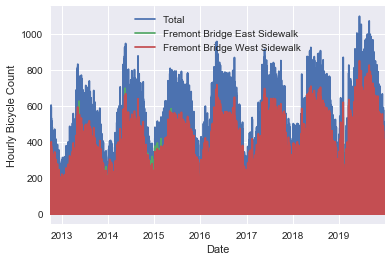

In [35]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

The 25000ish hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. When we get to the data on the weekly level, we will see some interesting seasonal trends: people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.

Text(0,0.5,'Weekly bicycle count')

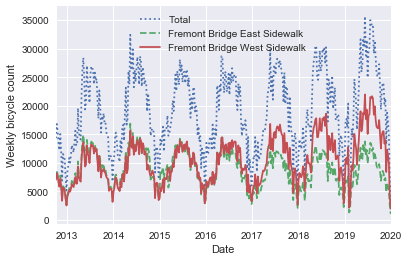

In [36]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() method. Here we'll do a 30 day rolling mean of our data, making sure to center the window:

Text(0,0.5,'average count')

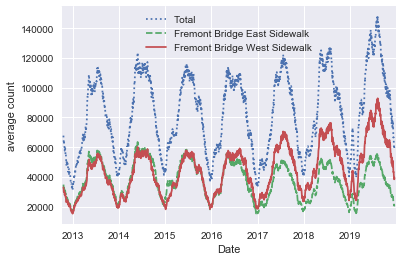

In [37]:
daily = data.resample('D').sum() # resampling by day
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('average count')

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

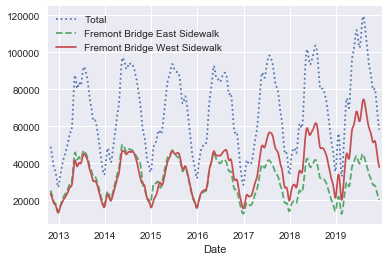

In [38]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality. As we will see, the hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

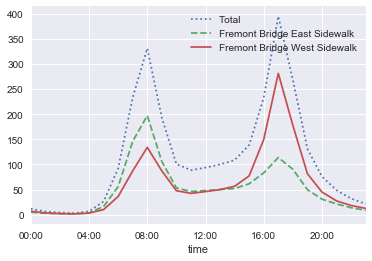

In [39]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple group-by operation. We will see that there is a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

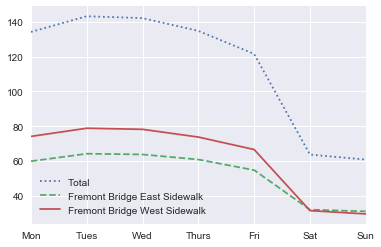

In [40]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

Finally, let's do a compound group=by analysis and look at the hourly trend on weekdays versus weekends. We'll start by grouping by both a flag marking the weekend, and the time of day:

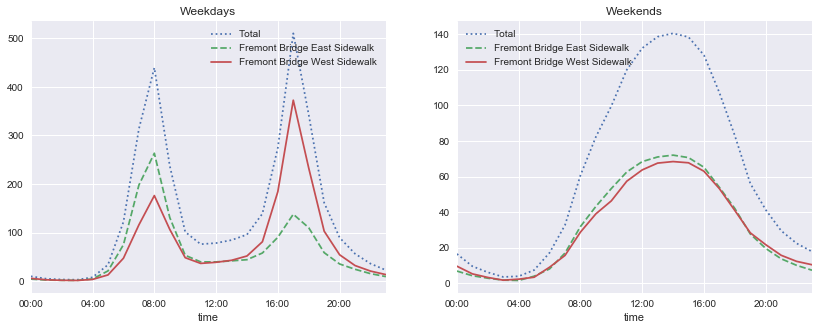

In [41]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

References:
    - https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
    - https://docs.python.org/3/library/datetime.html 
    - https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
    - https://seaborn.pydata.org/generated/seaborn.set.html
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
    - https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD